## How to add Moment 0 contours? (to make rotation more evident, blue/red contours)

### Import Packages

In [60]:
from astropy.io import fits
from astropy.coordinates import SkyCoord
import aplpy
from astropy import units as u  
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.pyplot as plt
from astropy.io import fits 
from astropy import wcs
from astropy import coordinates
import os
import sys
import matplotlib.ticker as ticker
from matplotlib import rc
rc('text', usetex=False)

### Files

In [61]:
filename='/home/juan/Desktop/Research/Data2.0/Serpens/Serpens_concat_c18o_cube.fits'
filename='/home/juan/Desktop/Research/Data2.0/Serpens/Serpens_Feather_c18o.fits'
filename_mom1 = '/home/juan/Desktop/Research/Data2.0/moment_1_masked_New.fits' 
filename_cont='/home/juan/Desktop/Research/Data2.0/dustContinuum.fits'
filenametxt='/home/juan/Desktop/Research/Data/sourcecoordinates.txt'

### Source Info.

In [62]:
source=45
source2=46
ra,dec = np.loadtxt(filenametxt,unpack=True,usecols=(0,1),dtype='S')
#coord=SkyCoord(ra,dec,frame='icrs',unit=(u.hourangle,u.deg)) 
fig = plt.figure('Source '+str(source)+' and '+str(source2),figsize=(15,15))
#c = SkyCoord(coord[source-1].ra,coord[source-1].dec, frame='icrs',unit=(u.hourangle,u.deg))
Ra=[]
Dec=[]
for i in range(len(ra)):
    Ra.append(ra[i].decode("utf-8"))
for i in range(len(dec)):
    Dec.append(dec[i].decode("utf-8"))
coord=SkyCoord(Ra,Dec,frame='icrs',unit=(u.hourangle,u.deg)) 
c = SkyCoord(coord[source-1].ra,coord[source-1].dec, frame='icrs',unit=(u.hourangle,u.deg))
RAcoord=c.ra
Deccoord=c.dec
vc=8.0*u.km/u.s 

<Figure size 1080x1080 with 0 Axes>

### Cubes

In [63]:
cube1=SpectralCube.read(filename)
cubec=SpectralCube.read(filename_cont)
moment=fits.open(filename_mom1)
moment_1=moment[0].data

### Moment 1 Map

In [64]:
f2 = aplpy.FITSFigure(filename_mom1,figure=fig)
mom1_vmin = ((vc.value-0.8)*1000.)
mom1_vmax = ((vc.value+0.8)*1000.)
f2.show_colorscale(vmin=mom1_vmin,vmax=mom1_vmax,cmap='jet')

### Recenter plot

In [65]:
## you can recenter the plot to your chosen coordinate
xx=np.abs(cube1.header['NAXIS1']*cube1.header['cdelt1'])#np.abs is absolute value. 'Naxis1'*'cdelt1" will give length of x axis in 
yy=np.abs(cube1.header['NAXIS2']*cube1.header['cdelt2'])
f2.recenter(RAcoord+0.0*u.arcsec,Deccoord+0.0*u.arcsec,width=xx*0.03,height=yy*0.03)

### Show marker on each source

In [66]:
filenametxt='/home/juan/Desktop/Research/Data/sourcecoordinates.txt'
ra,dec = np.loadtxt(filenametxt,unpack=True,usecols=(0,1),dtype='S')
coord=SkyCoord(ra,dec,frame='icrs',unit=(u.hourangle,u.deg))
for i in range(len(ra)):
    f2.show_markers(coord[i].ra.value,coord[i].dec.value,edgecolor='red',marker="o",linewidths=2,s=30)

### Show the colorbar

In [67]:
f2.add_colorbar()

### Hack for colorbar labels in km/s

In [68]:
cb_inter=200.*u.m/u.s
labels=(np.arange(mom1_vmin,mom1_vmax+cb_inter.value,cb_inter.value))*(u.m/u.s)
f2.colorbar.set_labels(False)
#f2.colorbar.set_ticks(labels.value)
f2.colorbar.set_width(0.1)
f2.colorbar.set_pad(-0.1)
f2.colorbar.set_axis_label_pad(30)
f2.colorbar.set_axis_label_text('km s$^{-1}$')
f2.colorbar.set_axis_label_font(size='14')
f2.hide_yaxis_label()
f2.hide_ytick_labels()
xlim_mom=f2._ax1.get_xlim()
ylim_mom=f2._ax1.get_ylim()
hack_labels=np.arange(0,1.01,1./(labels.size-1))
for ll in range(labels.size): 
	labelfloat = round(labels[ll].value/1000.,2)-vc.value
	f2.add_label(1.05,hack_labels[ll],str(labelfloat),relative=True,color='black',size='14')

### Add the beamsize 

In [69]:
bmaj=1.043*u.arcsec.to(u.deg)
bmin=0.7046*u.arcsec.to(u.deg)
bpa=76.299
f2.add_beam(major=bmaj,minor=bmin,angle=bpa,pad=0.2)

### Save figure

In [70]:
#f2.save('Source '+str(source)+' to'+str(source2)+'.png')

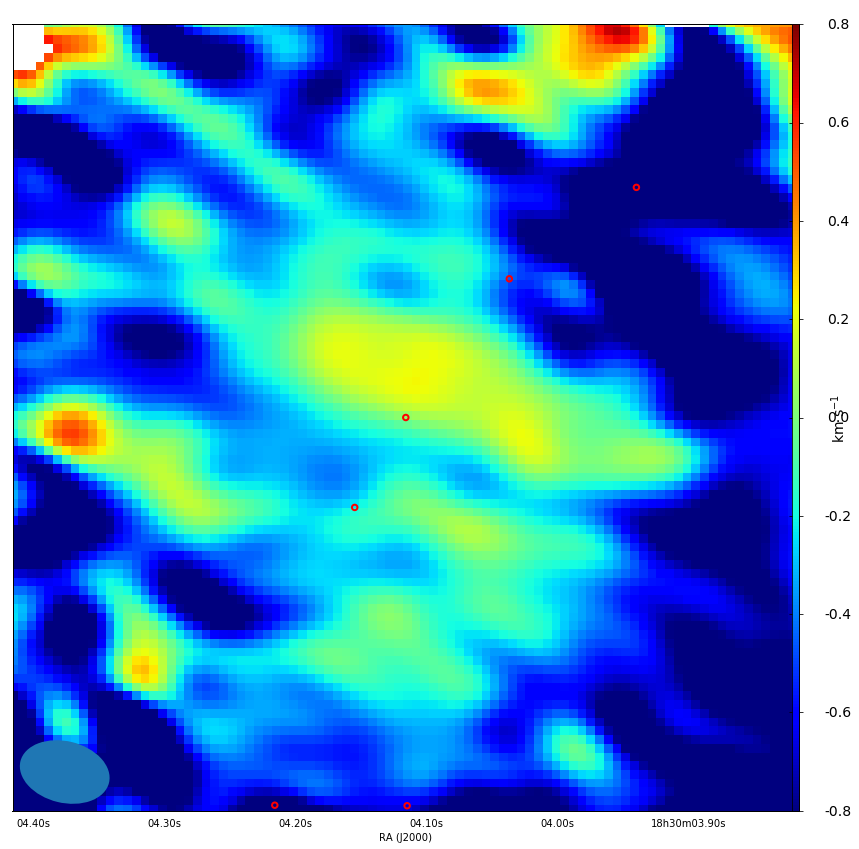

In [71]:
fig